# Inicialização

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt


dataset = np.genfromtxt('californiabin.csv', delimiter=',')
X = dataset[:,:-1]
min_X = np.min(X, axis = 0)
range_X = np.max(X, axis = 0) - min_X
y = dataset[:,-1]
min_y = np.min(y)
range_y = np.max(y) - min_y

X_norm = (X - min_X) / range_X
y_norm = (y - min_y) / range_y

print(dataset.shape)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2, random_state=11)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=11)

(2000, 9)


# SVM | Validação

In [2]:

c = []
for i in range(-5, 16, 2):
  c.append(2**i)
gamma = []
for i in range(-15, 1, 2):
  gamma.append(2**i)
gamma.append(2**1)
gamma.append(2**2)
gamma.append(2**3)

param_grid = {
    'C': c,
    'gamma': gamma,
}

model = SVC(kernel = 'rbf')
cv = KFold(n_splits=10)
grid_search = GridSearchCV(model, param_grid, cv=cv, n_jobs = 5)
grid_search.fit(X_val, y_val)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(), n_jobs=5,
             param_grid={'C': [0.03125, 0.125, 0.5, 2, 8, 32, 128, 512, 2048,
                               8192, 32768],
                         'gamma': [3.0517578125e-05, 0.0001220703125,
                                   0.00048828125, 0.001953125, 0.0078125,
                                   0.03125, 0.125, 0.5, 2, 4, 8]})

# SVM | Treino e Teste

Acurácia: 0.8275
Precisão: 0.8028846153846154
Revocação: 0.8564102564102564
F1-score: 0.8287841191066997


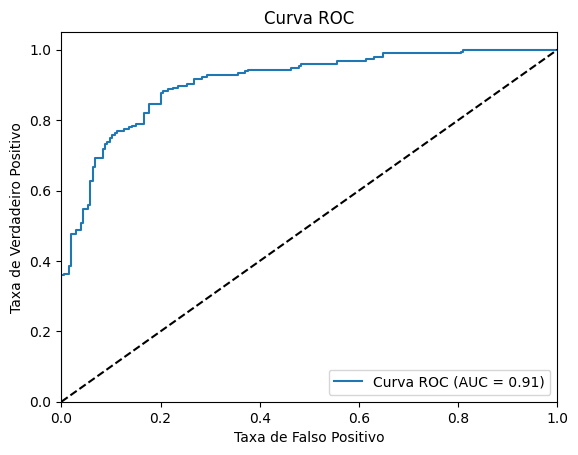

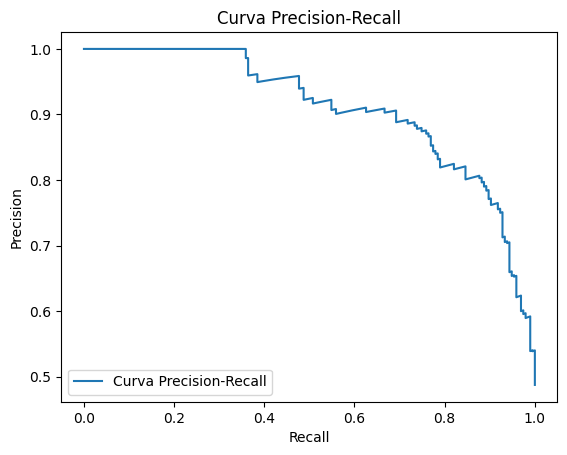

In [3]:
best_param = grid_search.best_params_
best_c = best_param['C']
best_gamma = best_param['gamma']

X_trainval = np.vstack((X_train, X_val))
y_trainval = np.hstack((y_train, y_val))

model = SVC(kernel = 'rbf', C = best_c, gamma = best_gamma, probability = True)
model.fit(X_trainval, y_trainval)
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

acuraccy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Acurácia:", acuraccy)
print("Precisão:", precision)
print("Revocação:", recall)
print("F1-score:", f1)

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
plt.figure()
plt.plot(recall, precision, label='Curva Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend(loc="lower left")
plt.show()


# Random Forest | Validação

In [4]:
n_base = []
for i in range(10, 201, 10):
  n_base.append(i)
max_prof = []
for i in range(4, 11, 2):
  max_prof.append(i)

param_grid = {
    'n_estimators': n_base,
    'max_depth': max_prof,
}

model = RandomForestClassifier()
cv = KFold(n_splits=10)
grid_search = GridSearchCV(model, param_grid, cv=cv, n_jobs = 5)
grid_search.fit(X_val, y_val)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'max_depth': [4, 6, 8, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200]})

# Random Forest | Treino e Teste

Acurácia: 0.85
Precisão: 0.8426395939086294
Revocação: 0.8512820512820513
F1-score: 0.846938775510204


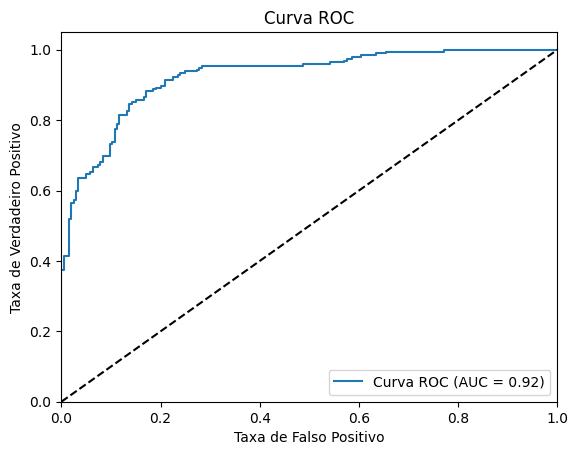

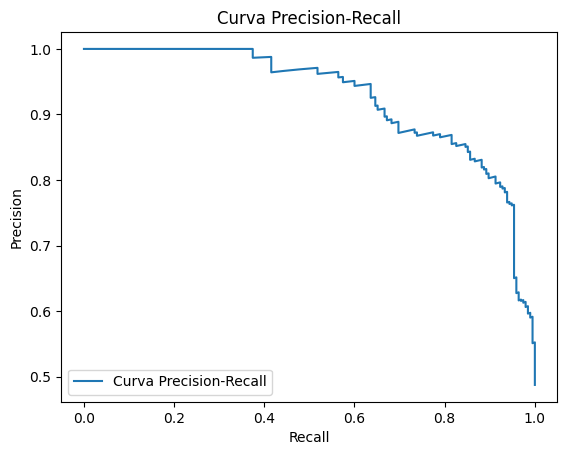

In [5]:
best_param = grid_search.best_params_
best_n_estim = best_param['n_estimators']
best_max_depth = best_param['max_depth']

X_trainval = np.vstack((X_train, X_val))
y_trainval = np.hstack((y_train, y_val))

model = RandomForestClassifier(n_estimators = best_n_estim, max_depth = best_max_depth)
model.fit(X_trainval, y_trainval)
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

acuraccy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Acurácia:", acuraccy)
print("Precisão:", precision)
print("Revocação:", recall)
print("F1-score:", f1)

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
plt.figure()
plt.plot(recall, precision, label='Curva Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend(loc="lower left")
plt.show()